<a href="https://colab.research.google.com/github/sineefa/image-processing-assignment2/blob/main/Assignment_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

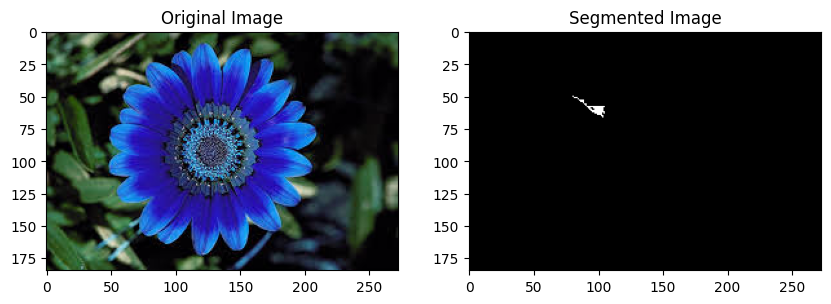

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('image.jpeg')
def region_growing(image, seed):

    seed_point = seed
    threshold = 10
    output = np.zeros_like(image)
    connectivity = 8

    # Define the queue for the pixels to be processed
    queue = []
    queue.append(seed_point)

    # Loop through the queue
    while queue:

        current_point = queue.pop(0)

        if np.any(output[current_point] != 0):
            continue

        if np.any(np.absolute(image[current_point] - image[seed_point]) < threshold):

            output[current_point] = 255

            neighbors = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
            neighbors = np.array(neighbors, dtype=np.uint8)

            for i in range(len(neighbors)):
                neighbor_point = (current_point[0]+neighbors[i,0], current_point[1]+neighbors[i,1])
                if neighbor_point[0] < 0 or neighbor_point[1] < 0 or neighbor_point[0] >= image.shape[0] or neighbor_point[1] >= image.shape[1]:
                    continue
                queue.append(neighbor_point)

    return output

seed = (50, 80)

segmented = region_growing(img, seed)

# Display the results
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')
plt.show()